<body>
    <div>
        <h2 style='font-family: cursive; font-size: 40px;'>Teorema de Bolzano</h2>
        <img src="https://ece.uwaterloo.ca/~dwharder/NumericalAnalysis/10RootFinding/bisection/bisection.gif" align='left' width="400">
        <img src="https://upload.wikimedia.org/wikipedia/commons/7/7f/BBolzano.jpg" align="middle" width="225">
    </div>
</body>

<h3 style="font-family: 'Courier New'; font-size:25px"
    >Formulación matemática</h3>

<p style="font-size: 16px;">
    Sea <i>f</i> una función real, definida y continua sobre un intervalo cerrado [a, b].<br>
    Si se cumple que: <br> 
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;<i>$f(a)*f(b)$ &lt; $0$</i> <br>
    entonces existe &#949; &#8714; [a, b] tal que <br>
    &emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;&emsp;$f($&#949;$) = 0$
</p>


<h3 style="font-family: 'Courier New'; font-size:25px"
    >Valores iniciales</h3>

<p style="font-size: 16px">
    &emsp;&emsp;&emsp;&emsp;a:   &nbsp;&nbsp;&emsp;&emsp;Punto inicial del intervalo. <br>
    &emsp;&emsp;&emsp;&emsp;b:   &nbsp;&nbsp;&emsp;&emsp;Punto final del intervalo. <br>
    &emsp;&emsp;&emsp;&emsp;tol: &emsp;&emsp;La exactitud de la aproximación.
</p>

<h3 style="font-family: 'Courier New'; font-size:25px"
    >Ventajas y desventajas</h3>



<table style="width:100%; text-align: left; font-size: 14px">
    <tr style="text-align: left;">
        <th style="text-align: left;">Ventajas</th>
        <th style="text-align: left;">Desventajas</th>
    </tr>
    <tr>
        <td style="text-align: left;">Es siempre convergente.</td>
        <td style="text-align: left;">Converge muy lentamente.</td>
    </tr>
    <tr>
        <td style="text-align: left;">Requiere que f sea continua en el intervalo especificado.</td>
        <td style="text-align: left;">Permite encontrar solo una raíz, aunque existan más en el intervalo.</td>
    </tr>
    <tr>
        <td style="text-align: left;">Se puede establecer el límite de error.	</td>
        <td style="text-align: left;">Algunas veces la determinación del intervalo inicial no es muy fácil.</td>
    </tr>
    <tr>
        <td style="text-align: left;">Es fácil de implementar.	</td>
        <td style="text-align: left;">A veces, no es obvio el criterio de finalización del proceso iteractivo.</td>
    </tr>
</table>

<h3 style="font-family: 'Courier New'; font-size:25px"
    >Pseudocódigo</h3>

<ol>
    <li>Si <i>f(a)*f(b) &gt; 0</i> </li>
    <li>Retornar resultado nulo y mostrar un mensaje que "No cumple la condicion del Teorema de Bolzano". </li>
    <li>Sino</li>
    <li>$error=tol+1$</li>
    <li>$k=0$</li>
    <li>Mientras error &lt; tol</li>
    <li>$k=k+1$</li>
    <li>$X_k = (a+b)/2$</li>
    <li>$error=\mathopen|f($x_k$)\mathclose|$ </li>
    <li>Si $f(a)*f(b)$ $\leq$ $0$</li>
    <li>$b =$ $X_k$</li>
    <li>Sino</li>
    <li>$a=$ $X_k$ </li>
    <li>Fin Si</li>
    <li>Fin Mientras</li>
    <li>Fin Si</li>
</ol>

<h3 style="font-family: 'Courier New'; font-size:25px">Octave</h3>

In [10]:
format long
function y=x1(a, b)
    y=(a+b)/2;
end

function [xk,error]=bolzano(f,a,b,tol,iter)
    %Esta función aproxima la solución de la ecuación f(x)=0, utilizando el método de bolzano
    %
    %Sintaxis:  bolzano(f,a,b,tol,iter)
    % 
    %Parámetros Iniciales: 
    %            f = una  cadena de caracteres (string) que representa a la función f
    %            a,b = son los extremos del intervalo [a,b]
    %            tol = un número positivo que representa a la tolerancia para el criterio |f(x_k)|<tol
    %            iter = cantidad de iteraciones máximas
    %            
    %Parámetros de Salida:                           
    %            res = aproximación del cero de la función f
    %            error =  |f(x)|
    
    footion = str2func(strcat('@(x)',f));
    res0=0;
    e=[];
    error=1; 
    
    if footion(a)*footion(b) > 0 || tol < 10^-8
        x=[];error=[];
        display('El teorema de Bolzano no se cumple, es decir, f(a)*f(b)>0');
    else 
        for i=1:iter
            xk=x1(a,b);
            res=footion(xk);
            error=abs(res-res0);
            e=[e error];
            if error<tol
                break;
            else
                if res*footion(b)<0
                    a=xk;
                else
                    b=xk;
                end
            end
            res0=res;
        end
        plot(0:length(e)-1,e)
    end
end


<h3 style="font-family: 'Courier New'; font-size:25px">Python</h3>

In [14]:
def iter_list(it):
    list = []
    for i in range(it):
        list.append(i)
    return list
    
    
def plot(e):
    import matplotlib.pyplot
    matplotlib.pyplot.plot(iter_list(len(e)), e)
    
    
def x1(a, b):
    return (a + b) / 2


def bolzano(f, a, b, tol, iter):
    """
    Esta función aproxima la solución de una ecuació f(x)=0, implementando el metodo de la Secante.
    Parametros iniciales:
    f = una  cadena de caracteres (string) que representa a la función f
    a, b = son los extremos del intervalo [a,b].
    tol = un número positivo que representa a la tolerancia para el criterio |f(x_k)|<tol.
    iter = cantidad de iteraciones máximas.
    Parámetros de Salida: 
    [res1,error], donde                
    res1 = aproximación del cero de la función f
    error =  |f(x_k)|
    """
    from sympy import sympify
    
    footion = sympify(f)
    fa = float(footion.subs({'x': a}))
    fb = float(footion.subs({'x': b}))

    res0 = 0
    res1 = 0
    xn = a
    e = []
    
    if fa * fb > 0 or tol < 10^-8:
        return 'El teorema de Bolzano no se cumple, es decir, f(a)*f(b)>0'
    else:
        for i in range(iter):
            xk = x1(a, b)
            res1 = float(footion.subs({'x': xk}))
            error = abs((xk - xn)/xk)*100
            xn = xk
            e.append(error)
            
            if error < tol:
                break
            else:
                if res1 * float(footion.subs({'x': b})) < 0:
                    a = xk
                else:
                    b = xk
            res0 = res1
        plot(e)
        return [xk, e]


<h3 style="font-family: 'Courier New'; font-size:25px">Ejemplo Numérico</h3>

<h5 style="font-family: 'Courier New'; font-size:16px">Python</h5>

In [17]:
#print(bolzano('x^2-sin(x)',0.5,1,0.0004,20))

print(bolzano('1-(20^2/(9.81*(3*x+x^2/2)))*(3+x)', 0.5, 2.5, 0.0004,20))

El teorema de Bolzano no se cumple, es decir, f(a)*f(b)>0


<h5 style="font-family: 'Courier New'; font-size:16px">Octave</h5>

res =    8.767242431640625e-01
error =    1.699519554321238e-05


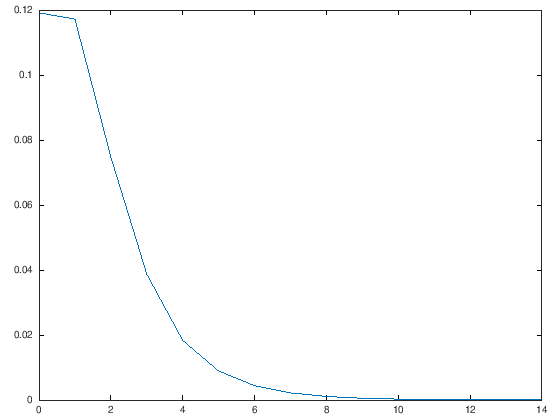

In [11]:
[res,error]=bolzano('x^2-sin(x)',0.5,1,0.00003,20)